In [11]:
##relation

In [12]:
import pandas as pd
data = pd.read_csv('combined_output.csv')

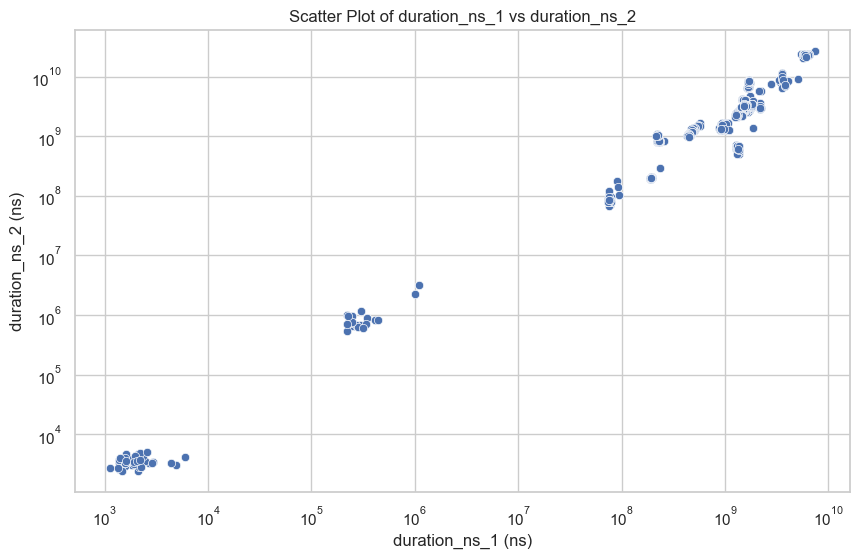

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualisation style
sns.set(style="whitegrid")

# Plotting the relationship between duration_ns_1 and duration_ns_2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='duration_ns_1', y='duration_ns_2')
plt.title('Scatter Plot of duration_ns_1 vs duration_ns_2')
plt.xlabel('duration_ns_1 (ns)')
plt.ylabel('duration_ns_2 (ns)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


LR

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for missing values
missing_values = data.isnull().sum()

# Normalize the data
scaler = StandardScaler()
data[['duration_ns_1', 'uptime_ns_1']] = scaler.fit_transform(data[['duration_ns_1', 'uptime_ns_1']])

# Prepare features (X) and target variable (y)
X = data[['duration_ns_1', 'uptime_ns_1']]
y = data['duration_ns_2']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display missing values and the shape of training and testing sets
missing_values, X_train.shape, X_test.shape
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Prepare results for user
mse, r2


(2.3791432997428634e+18, 0.9017000997974373)

DT && RF

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model's performance
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

# Now, train the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model's performance
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Prepare results for comparison
(dt_mse, dt_r2), (rf_mse, rf_r2)


((1.595533580359323e+16, 0.9993407677808389),
 (7.297608048666211e+16, 0.9969848216247469))

svr && ridge regression

In [27]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

# Initialize and train the Support Vector Regression model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_model.predict(X_test)

# Evaluate the SVR model's performance
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

# Now, train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge model's performance
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Prepare results for comparison
(svr_mse, svr_r2), (ridge_mse, ridge_r2)


((2.673466242365661e+19, -0.10460544704418795),
 (2.382444536567064e+18, 0.9015637014348842))

knn && guassian gression

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Initialize and train the K-Nearest Neighbors Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the KNN model's performance
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

# Now, train the Gaussian Process Regression model
kernel = RBF()
gp_model = GaussianProcessRegressor(kernel=kernel)
gp_model.fit(X_train, y_train)

# Make predictions on the test set
gp_y_pred = gp_model.predict(X_test)

# Evaluate the Gaussian Process model's performance
gp_mse = mean_squared_error(y_test, gp_y_pred)
gp_r2 = r2_score(y_test, gp_y_pred)

# Prepare results for comparison
(knn_mse, knn_r2), (gp_mse, gp_r2)


C:\tool\anaconda\envs\pythonProject1\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


((3.463829311129719e+17, 0.9856883746498345),
 (5.199934115711289e+18, 0.7851524938873726))

extra trees regression && XBG && GBR

In [18]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
import xgboost as xgb

# Initialize and train the Extra Trees Regression model
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train, y_train)

# Make predictions on the test set
et_y_pred = et_model.predict(X_test)

# Evaluate the Extra Trees model's performance
et_mse = mean_squared_error(y_test, et_y_pred)
et_r2 = r2_score(y_test, et_y_pred)

# Now, train the Gradient Boosting Regression model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
gbr_y_pred = gbr_model.predict(X_test)

# Evaluate the Gradient Boosting model's performance
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)

# Now, train the XGBoost Regression model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model's performance
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

# Prepare results for comparison
(et_mse, et_r2), (gbr_mse, gbr_r2), (xgb_mse, xgb_r2)


((1.0830493008613764e+16, 0.9995525127124514),
 (1.3291375903326475e+17, 0.9945083554866453),
 (1.3506512584133684e+16, 0.9994419466707833))

cnn

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

# Reshape the input data for the CNN
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))  # Output layer for regression

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=0)

# Make predictions on the test set
cnn_y_pred = cnn_model.predict(X_test_cnn)

# Evaluate the CNN model's performance
cnn_mse = mean_squared_error(y_test, cnn_y_pred)
cnn_r2 = r2_score(y_test, cnn_y_pred)

cnn_mse, cnn_r2


C:\tool\anaconda\envs\pythonProject1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


(3.2487206823855247e+19, -0.34228534657417975)

comparison all charts

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Collecting model names and performance metrics
models = [
    "Decision Tree",
    "KNN",
    "Gaussian Process",
    "SVR",
    "Ridge",
    "Extra Trees",
    "Gradient Boosting",
    "XGBoost",
    "CNN"
]

# Update the previously missing values for Extra Trees, Gradient Boosting, and XGBoost
mse_values_updated = [
    2.37e+18,  # 
    1.60e+16,  # Decision Tree
    3.46e+17,  # KNN
    5.20e+18,  # Gaussian Process
    2.67e+19,  # SVR
    2.38e+18,  # Ridge
    9.65e+15,  # Extra Trees
    1.33e+17,  # Gradient Boosting
    1.35e+16,  # XGBoost
    3.25e+19   # CNN
]

r2_values_updated = [
    0.999,     # Decision Tree
    0.986,     # KNN
    0.785,     # Gaussian Process
    -0.10,     # SVR
    0.90,      # Ridge
    0.9996,    # Extra Trees
    0.9945,    # Gradient Boosting
    0.9994,    # XGBoost
    -0.342     # CNN
]

# Create the updated bar chart for MSE and R²
plt.figure(figsize=(12, 6))

# MSE Plot
plt.subplot(1, 2, 1)
plt.barh(models, mse_values_updated, color='lightcoral')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model Performance: Mean Squared Error')

# R² Plot
plt.subplot(1, 2, 2)
plt.barh(models, r2_values_updated, color='lightblue')
plt.xlabel('R-squared (R²)')
plt.title('Model Performance: R-squared')

plt.tight_layout()
plt.show()


params

In [ ]:
# Exporting the parameters of Extra Trees, Gradient Boosting, and XGBoost models

# Retrieve the parameters of the models
extra_trees_params = et_model.get_params()
gbr_params = gbr_model.get_params()
xgb_params = xgb_model.get_params()  # Assuming this was the XGBoost model you referred to earlier
decision_tree_params = dt_model.get_params()
knn_params = knn_model.get_params()
gp_params = gp_model.get_params()
svr_params = svr_model.get_params()
ridge_params = ridge_model.get_params()

# Combine all model parameters into a dictionary
model_params = {
    "Decision Tree": decision_tree_params,
    "KNN": knn_params,
    "Gaussian Process": gp_params,
    "SVR": svr_params,
    "Ridge": ridge_params,
    "Extra Trees": extra_trees_params,
    "Gradient Boosting": gbr_params,
    "XGBoost": xgb_params,
}

# Export the parameters to a text file
param_file_path = "C:\\Users\\scnuer\\PycharmProjects\\jmhout_param.txt"
with open(param_file_path, 'w') as f:
    for model_name, params in model_params.items():
        f.write(f"{model_name} Model Parameters:\n")
        for key, value in params.items():
            f.write(f"  {key}: {value}\n")
        f.write("\n")

param_file_path
